In [1]:
ls

all-average-lmc.fits  error_with_jitter.py  rv_from_param.py
all-average-smc.fits  jitter.py             second_reduce.py
binary_detection.py   lnlikelihood.py       synthetic_fractions.py
binary_fraction.py    lnprior.py            synthetic_galaxy.py
binary_params.py      lnprob.py             table_convert.py
chi_sq_mean.py        machine_error.py      triangle.png
detection.pck         plot_rv.py            Untitled.ipynb
detectionrate.py      __pycache__/


In [102]:
%run binary_detection.py
%run binary_params.py

%run jitter.py
%run rv_from_param.py
%run chi_sq_mean.py
%run second_reduce.py
%run table_convert.py
%run plot_rv.py
%run synthetic_galaxy.py
%run machine_error.py
%run error_with_jitter.py
%run binary_fraction.py

In [54]:
from astropy.io import fits
from astropy.table import Table

In [55]:
lmc = fits.getdata('all-average-lmc.fits')
lmc = table_convert(lmc)
lmc = second_reduce(Table(lmc))
lmc['RADIALV'].unit = u.km/u.s
lmc['RADIAL_ERR'].unit = u.km/u.s
smc = fits.getdata('all-average-smc.fits')
smc = table_convert(smc)
smc = second_reduce(Table(smc))
smc['RADIALV'].unit = u.km/u.s
smc['RADIAL_ERR'].unit = u.km/u.s

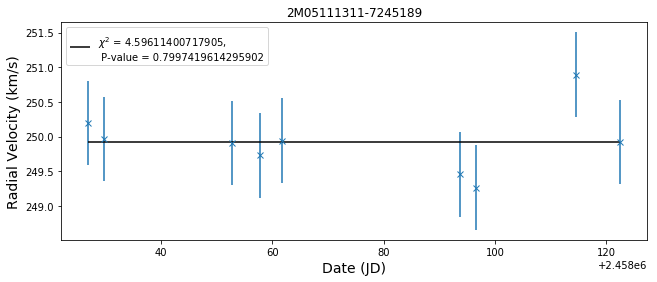

In [178]:
from scipy.stats import chi2
fig = plt.figure(figsize=(10.5, 4.))
n = 1
lmc_err_j0 = error_with_jitter(lmc['RADIAL_ERR'][n], 0., 0.61, lmc['LOGG'][n])

plt.errorbar(lmc['RADIAL_DATE'][n], lmc['RADIALV'][n], yerr = lmc_err_j0, fmt = 'x')
chisq = chi_sq_mean(lmc['RADIALV'][n], lmc_err_j0)
p_value = 1 - chi2.cdf(chisq, len(lmc['RADIALV'][n]) - 1)
plt.hlines(np.mean(lmc['RADIALV'][n]), lmc['RADIAL_DATE'][n][0], lmc['RADIAL_DATE'][n][-1])
plt.title(lmc['APOGEE_ID'][n])
plt.legend(["$\chi^2$ = {}, \n P-value = {}".format(chisq, p_value)],loc = 2)
plt.xlabel('Date (JD)', size = 14)
plt.ylabel('Radial Velocity (km/s)', size = 14)
fig.savefig('/home/cody/Binary Search/AAS Seattle Talk/RV example solo')

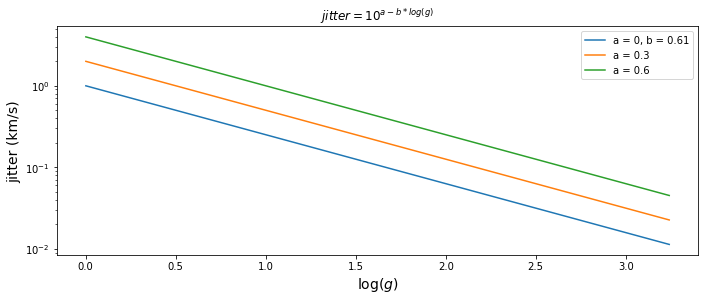

In [177]:
fig = plt.figure(figsize=(11.5, 4.2))
g = np.linspace(min(lmc['LOGG']), max(lmc['LOGG']), 1000)
plt.plot(g, jitter(0.0, 0.6, g), label = 'a = 0, b = 0.61')
plt.plot(g, jitter(0.3, 0.6, g), label = "a = 0.3")
plt.plot(g, jitter(0.6, 0.6, g), label = "a = 0.6")
plt.title("$jitter = 10^{a - b*log(g)}$")
plt.ylabel('jitter (km/s)', size = 14)
plt.xlabel('$\log(g)$', size = 14)
plt.legend()
plt.yscale('log')
fig.savefig('/home/cody/Binary Search/AAS Seattle Talk/jitter.png')

In [179]:
lmc_err_j = error_with_jitter(lmc['RADIAL_ERR'], 0.3, 0.61, lmc['LOGG'])

lmc_detection_rate = binary_fraction(lmc['RADIALV'],
                                     lmc["RADIAL_ERR"])
lmc_detection_rate_j = binary_fraction(lmc['RADIALV'], lmc_err_j)

In [180]:
lmc_detection_rate, lmc_detection_rate_j

(0.9263959390862944, 0.10406091370558376)

In [181]:
rv_syn1, err_syn1 = synthetic_galaxy(lmc, 1, 100*u.jupiterMass, 3, 2)
rv_syn0, err_syn0 = synthetic_galaxy(lmc, 0, 100*u.jupiterMass, 3, 2)

In [182]:
err_syn0_j = error_with_jitter(err_syn0, 0, 0.6, lmc['LOGG'])
err_syn1_j = error_with_jitter(err_syn1, 0, 0.6, lmc['LOGG'])

In [80]:
# Add machine error to synthetic observations
rv_syn_j = machine_error(rv_syn, err_syn_j)

In [81]:
syn_fraction_j = binary_fraction(rv_syn_j, err_syn_j)

In [82]:
syn_fraction_j

0.1814720812182741

In [83]:
%run synthetic_fractions.py

In [307]:
lmc_syn_list1 = synthetic_fractions(10, lmc, 1, 
                               100*u.jupiterMass, 2.5, 2,
                               0.2, 0.61)
lmc_syn_list0 = synthetic_fractions(10, lmc, 0, 
                               100*u.jupiterMass, 2.5, 2,
                               0.2, 0.61)

smc_syn_list1 = synthetic_fractions(10, smc, 1, 
                               100*u.jupiterMass, 2.5, 2,
                               0.2, 0.61)
smc_syn_list0 = synthetic_fractions(10, smc, 0, 
                               100*u.jupiterMass, 2.5, 2,
                               0.2, 0.61)

Done with  0
Done with  1
Done with  2
Done with  3
Done with  4
Done with  5
Done with  6
Done with  7
Done with  8
Done with  9
Done with  0
Done with  1
Done with  2
Done with  3
Done with  4
Done with  5
Done with  6
Done with  7
Done with  8
Done with  9
Done with  0
Done with  1
Done with  2
Done with  3
Done with  4
Done with  5
Done with  6
Done with  7
Done with  8
Done with  9
Done with  0
Done with  1
Done with  2
Done with  3
Done with  4
Done with  5
Done with  6
Done with  7
Done with  8
Done with  9


In [308]:
lmc_err_j = error_with_jitter(lmc['RADIAL_ERR'], 0.2, 0.61, lmc['LOGG'])
lmc_detection_rate_j = binary_fraction(lmc['RADIALV'], lmc_err_j)

smc_err_j = error_with_jitter(smc['RADIAL_ERR'], 0.2, 0.61, smc['LOGG'])
smc_detection_rate_j = binary_fraction(smc['RADIALV'], smc_err_j)


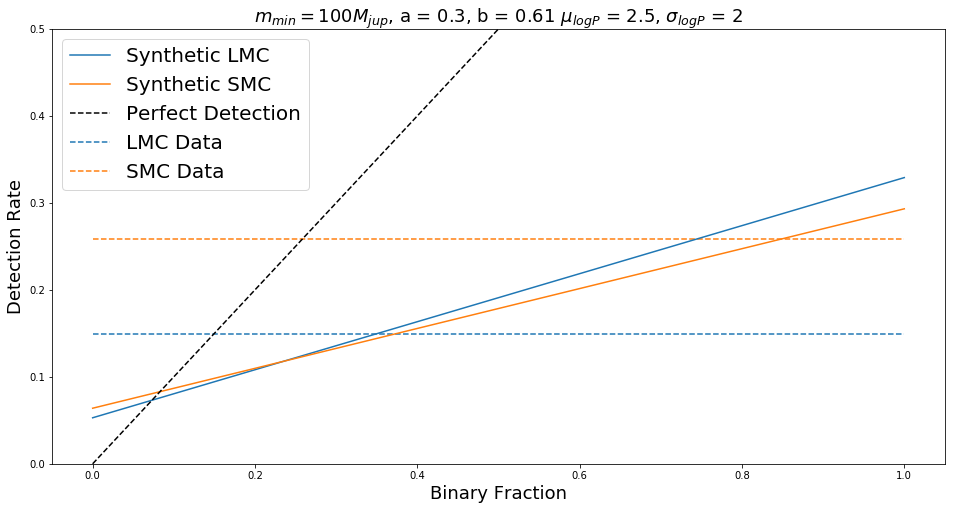

In [309]:
fig = plt.figure(figsize = (16,8))
plt.plot([0,1], [np.mean(lmc_syn_list0), np.mean(lmc_syn_list1)], label = 'Synthetic LMC')
plt.plot([0,1], [np.mean(smc_syn_list0), np.mean(smc_syn_list1)], label = 'Synthetic SMC')
plt.hlines(lmc_detection_rate_j, 0, 1, color = 'C0', linestyles='dashed', label = 'LMC Data')
plt.hlines(smc_detection_rate_j, 0, 1, color = 'C1', linestyles='dashed', label = 'SMC Data')

plt.plot([0,1],[0,1],'--', color = 'black',label = 'Perfect Detection')
plt.xlabel('Binary Fraction', size = 18)
plt.ylabel('Detection Rate', size = 18)
plt.title('$m_{min} = 100 M_{jup}$, a = 0.3, b = 0.61 $\mu_{logP}$ = 2.5, $\sigma_{logP}$ = 2', size = 18)
plt.ylim(0,0.5)
plt.legend(prop = {'size': 20}, loc = 2)
plt.show()
fig.savefig("/home/cody/Binary Search/AAS Seattle Talk/detection1.png")

In [249]:
blmc_syn_list1 = synthetic_fractions(10, lmc, 1, 
                               100*u.jupiterMass, 3, 2.5,
                               0.5, 0.61)
blmc_syn_list0 = synthetic_fractions(10, lmc, 0, 
                               100*u.jupiterMass, 3, 2.5,
                               0.5, 0.61)

bsmc_syn_list1 = synthetic_fractions(10, smc, 1, 
                               100*u.jupiterMass, 3, 2.5,
                               0.5, 0.61)
bsmc_syn_list0 = synthetic_fractions(10, smc, 0, 
                               100*u.jupiterMass, 3, 2.5,
                               0.5, 0.61)

Done with  0
Done with  1
Done with  2
Done with  3
Done with  4
Done with  5
Done with  6
Done with  7
Done with  8
Done with  9
Done with  0
Done with  1
Done with  2
Done with  3
Done with  4
Done with  5
Done with  6
Done with  7
Done with  8
Done with  9
Done with  0
Done with  1
Done with  2
Done with  3
Done with  4
Done with  5
Done with  6
Done with  7
Done with  8
Done with  9
Done with  0
Done with  1
Done with  2
Done with  3
Done with  4
Done with  5
Done with  6
Done with  7
Done with  8
Done with  9


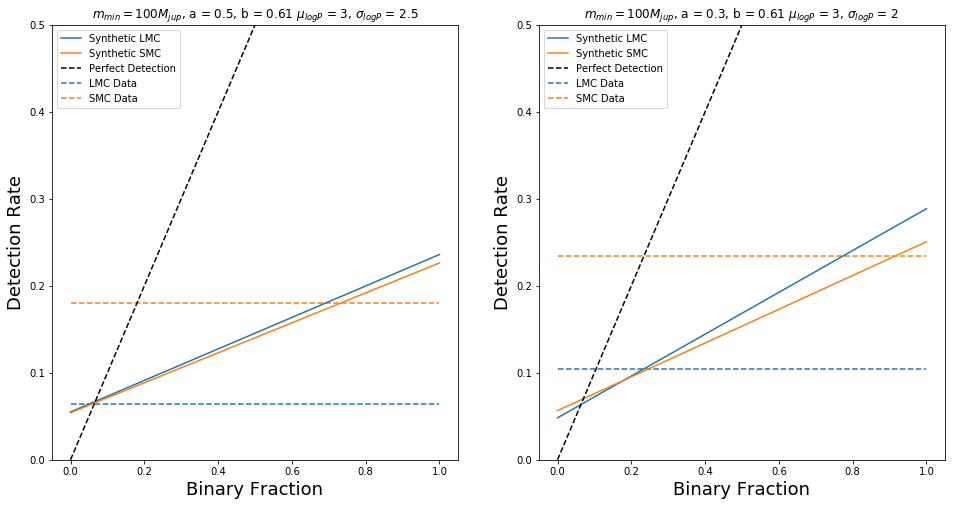

In [260]:
blmc_err_j = error_with_jitter(lmc['RADIAL_ERR'], 0.5, 0.61, lmc['LOGG'])

blmc_detection_rate_j = binary_fraction(lmc['RADIALV'], blmc_err_j)

bsmc_err_j = error_with_jitter(smc['RADIAL_ERR'], 0.5, 0.61, smc['LOGG'])
bsmc_detection_rate_j = binary_fraction(smc['RADIALV'], bsmc_err_j)

fig, ax= plt.subplots(1,2, figsize = (16,8))
ax[0].plot([0,1], [np.mean(blmc_syn_list0), np.mean(blmc_syn_list1)], label = 'Synthetic LMC')
ax[0].plot([0,1], [np.mean(bsmc_syn_list0), np.mean(bsmc_syn_list1)], label = 'Synthetic SMC')
ax[0].hlines(blmc_detection_rate_j, 0, 1, color = 'C0', linestyles='dashed', label = 'LMC Data')
ax[0].hlines(bsmc_detection_rate_j, 0, 1, color = 'C1', linestyles='dashed', label = 'SMC Data')

ax[0].plot([0,1],[0,1],'--', color = 'black',label = 'Perfect Detection')
ax[0].set_xlabel('Binary Fraction', size = 18)
ax[0].set_ylabel('Detection Rate', size = 18)
ax[0].set_title('$m_{min} = 100 M_{jup}$, a = 0.5, b = 0.61 $\mu_{logP}$ = 3, $\sigma_{logP}$ = 2.5',)
ax[0].set_ylim(0, 0.5)
ax[0].legend(loc = 2)

ax[1].plot([0,1], [np.mean(lmc_syn_list0), np.mean(lmc_syn_list1)], label = 'Synthetic LMC')
ax[1].plot([0,1], [np.mean(smc_syn_list0), np.mean(smc_syn_list1)], label = 'Synthetic SMC')
ax[1].hlines(lmc_detection_rate_j, 0, 1, color = 'C0', linestyles='dashed', label = 'LMC Data')
ax[1].hlines(smc_detection_rate_j, 0, 1, color = 'C1', linestyles='dashed', label = 'SMC Data')

ax[1].plot([0,1],[0,1],'--', color = 'black',label = 'Perfect Detection')
ax[1].set_xlabel('Binary Fraction', size = 18)
ax[1].set_ylabel('Detection Rate', size = 18)
ax[1].set_title('$m_{min} = 100 M_{jup}$, a = 0.3, b = 0.61 $\mu_{logP}$ = 3, $\sigma_{logP}$ = 2',)
ax[1].set_ylim(0, 0.5)
ax[1].legend(loc = 2)

plt.show()
fig.savefig("/home/cody/Binary Search/AAS Seattle Talk/detection2.png")

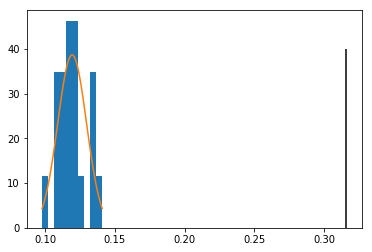

In [85]:
import matplotlib.pyplot as plt   
import scipy
plt.hist(syn_list, density = True)
x = np.linspace(min(syn_list), max(syn_list), 100)
plt.plot(x, scipy.stats.norm.pdf(x, np.mean(syn_list), np.std(syn_list)))
plt.vlines(lmc_detection_rate_j, 0, 40)

In [ ]:
syn_list

In [25]:
%run lnlikelihood.py

In [26]:
lnl = lnlikelihood(lmc_detection_rate_j, 10, 
                   lmc, 0.5, 100*u.jupiterMass, 
                   3, 2, 0.3, 0.61)

Done with  0
Done with  1
Done with  2
Done with  3


KeyboardInterrupt: 

In [ ]:
import emcee

In [ ]:
ndim, nwalkers = 4, 12
pos = [np.array([0.5, 0.1, 3, 2]) + 0.2*np.random.randn(ndim) for i in range(nwalkers)]

threads = 2
nsteps = 15

In [ ]:
pos

In [ ]:
%run lnprob
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args = (lmc_detection_rate_j,
                                                                    10, lmc, 100*u.jupiterMass, 0.61))

In [ ]:
 sampler.run_mcmc(pos, nsteps)

In [ ]:
samples = sampler.chain[:,:, :].reshape((-1, ndim))

In [ ]:
import corner
fig = corner.corner(samples, labels=["$bf$", "$a$", "$b$", "$\mu_{logP}$", "$\sigma_{logP}$"],
                    )
fig.savefig("triangle.png")

In [ ]:
sampler.acceptance_fraction

In [299]:
import datetime
import numpy as np
%run lnlikelihood.py
fractions = np.linspace(0, 1, 10)
a_range = [0, 0.3, 0.6]
b = 0.6
# lnlikelihood = np.zeros((len(fractions),len(a_range)))
all_likelihood = []
for m in range(len(a_range)):
    
    lmc_err_j = error_with_jitter(lmc['RADIAL_ERR'], a_range[m], 0.61, lmc['LOGG'])

    lmc_detection_rate = binary_fraction(lmc['RADIALV'],
                                     lmc["RADIAL_ERR"])
    lmc_detection_rate_j = binary_fraction(lmc['RADIALV'], lmc_err_j)
    
    lnl = []
    for n in range(len(fractions)):
        lnl.append(lnlikelihood(lmc_detection_rate_j, 10, 
                                         lmc, 
                                         fractions[n],
                                         100*u.jupiterMass,
                                         3, 2,
                                         a_range[m],
                                         0.61))
    print("Done with,", a_range[m])
    all_likelihood.append(lnl)

Done with  0
Done with  1
Done with  2
Done with  3
Done with  4
Done with  5
Done with  6
Done with  7
Done with  8
Done with  9
Done with  0
Done with  1
Done with  2
Done with  3
Done with  4
Done with  5
Done with  6
Done with  7
Done with  8
Done with  9
Done with  0
Done with  1
Done with  2
Done with  3
Done with  4
Done with  5
Done with  6
Done with  7
Done with  8
Done with  9
Done with  0
Done with  1
Done with  2
Done with  3
Done with  4
Done with  5
Done with  6
Done with  7
Done with  8
Done with  9
Done with  0
Done with  1
Done with  2
Done with  3
Done with  4
Done with  5
Done with  6
Done with  7
Done with  8
Done with  9
Done with  0
Done with  1
Done with  2
Done with  3
Done with  4
Done with  5
Done with  6
Done with  7
Done with  8
Done with  9
Done with  0
Done with  1
Done with  2
Done with  3
Done with  4
Done with  5
Done with  6
Done with  7
Done with  8
Done with  9
Done with  0
Done with  1
Done with  2
Done with  3
Done with  4
Done with  5
Done with  6

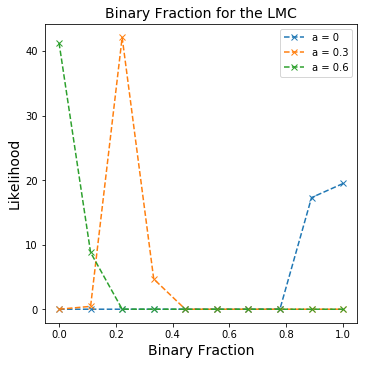

In [302]:
fig = plt.figure(figsize=(5.6,5.5))
for n in range(len(all_likelihood)):
    plt.plot(fractions[:], np.exp(np.array(all_likelihood[n][:])), 'x--',label = 'a = {}'.format(a_range[n]),)  
plt.legend()

plt.title("Binary Fraction for the LMC", size = 14)

plt.ylabel('Likelihood', size = 14)
plt.xlabel("Binary Fraction", size = 14)
fig.savefig('/home/cody/Binary Search/AAS Seattle Talk/lmc-binary-fracion.png')

Text(0, 0.5, '$\\ln$ Likelihood')

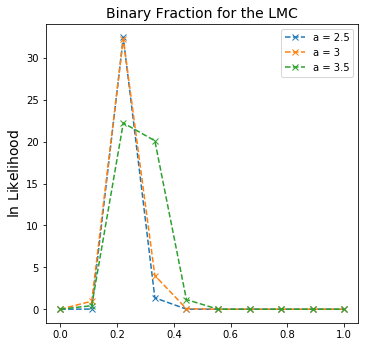

In [297]:
fig = plt.figure(figsize=(5.6,5.5))
for n in range(len(all_likelihood)):
    plt.plot(fractions[:], np.exp(np.array(all_likelihood[n][:])), 'x--',label = 'a = {}'.format(a_range[n]),)  
plt.legend()

plt.title("Binary Fraction for the LMC", size = 14)
plt.ylabel('$\ln$ Likelihood', size = 14)

Text(0, 0.5, 'Likelihood')

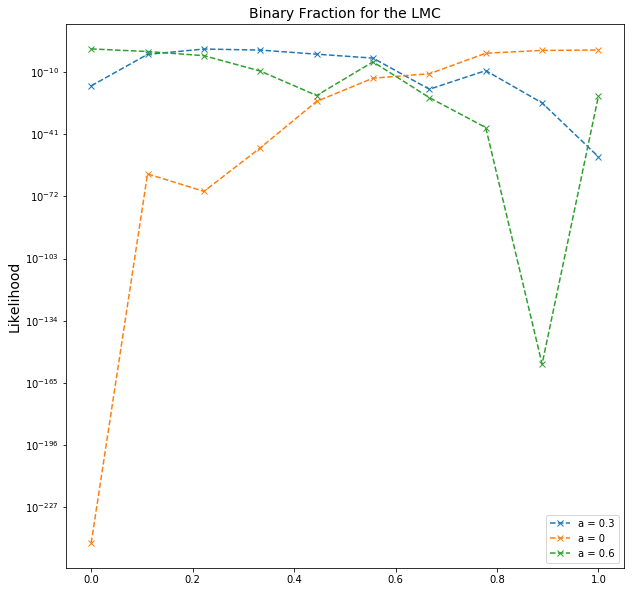

In [90]:
plt.figure(figsize=(10,10))
for n in range(len(all_likelihood)):
    plt.plot(fractions[:], np.exp(np.array(all_likelihood[n][:])), 'x--',label = 'a = {}'.format(a_range[n]),)  
plt.legend()
plt.title("Binary Fraction for the LMC", size = 14)
plt.ylabel('Likelihood', size = 14)

In [288]:
import datetime
import numpy as np
%run lnlikelihood.py
fractions = np.linspace(0, 1, 10)
a_range = [2.5, 3, 3.5]
b = 0.61
# lnlikelihood = np.zeros((len(fractions),len(a_range)))
all_likelihood = []
for m in range(len(a_range)):
    
    lmc_err_j = error_with_jitter(lmc['RADIAL_ERR'], 0.3, 0.61, lmc['LOGG'])

    lmc_detection_rate = binary_fraction(lmc['RADIALV'],
                                     lmc["RADIAL_ERR"])
    lmc_detection_rate_j = binary_fraction(lmc['RADIALV'], lmc_err_j)
    
    lnl = []
    for n in range(len(fractions)):
        lnl.append(lnlikelihood(lmc_detection_rate_j, 30, 
                                         lmc, 
                                         fractions[n],
                                         100*u.jupiterMass,
                                         a_range[m], 2.2,
                                         0.3,
                                         0.61))
    print("Done with,", a_range[m])
    all_likelihood.append(lnl)

Done with  0
Done with  1
Done with  2
Done with  3
Done with  4
Done with  5
Done with  6
Done with  7
Done with  8
Done with  9
Done with  10
Done with  11
Done with  12
Done with  13
Done with  14
Done with  15
Done with  16
Done with  17
Done with  18
Done with  19
Done with  20
Done with  21
Done with  22
Done with  23
Done with  24
Done with  25
Done with  26
Done with  27
Done with  28
Done with  29
Done with  0
Done with  1
Done with  2
Done with  3
Done with  4
Done with  5
Done with  6
Done with  7
Done with  8
Done with  9
Done with  10
Done with  11
Done with  12
Done with  13
Done with  14
Done with  15
Done with  16
Done with  17
Done with  18
Done with  19
Done with  20
Done with  21
Done with  22
Done with  23
Done with  24
Done with  25
Done with  26
Done with  27
Done with  28
Done with  29
Done with  0
Done with  1
Done with  2
Done with  3
Done with  4
Done with  5
Done with  6
Done with  7
Done with  8
Done with  9
Done with  10
Done with  11
Done with  12
Done wit

Done with  29
Done with, 3
Done with  0
Done with  1
Done with  2
Done with  3
Done with  4
Done with  5
Done with  6
Done with  7
Done with  8
Done with  9
Done with  10
Done with  11
Done with  12
Done with  13
Done with  14
Done with  15
Done with  16
Done with  17
Done with  18
Done with  19
Done with  20
Done with  21
Done with  22
Done with  23
Done with  24
Done with  25
Done with  26
Done with  27
Done with  28
Done with  29
Done with  0
Done with  1
Done with  2
Done with  3
Done with  4
Done with  5
Done with  6
Done with  7
Done with  8
Done with  9
Done with  10
Done with  11
Done with  12
Done with  13
Done with  14
Done with  15
Done with  16
Done with  17
Done with  18
Done with  19
Done with  20
Done with  21
Done with  22
Done with  23
Done with  24
Done with  25
Done with  26
Done with  27
Done with  28
Done with  29
Done with  0
Done with  1
Done with  2
Done with  3
Done with  4
Done with  5
Done with  6
Done with  7
Done with  8
Done with  9
Done with  10
Done with

Text(0, 0.5, '$\\ln$ Likelihood')

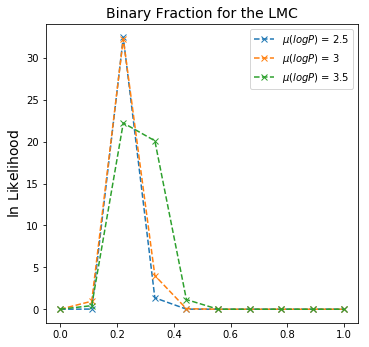

In [294]:
fig = plt.figure(figsize=(5.6,5.5))
for n in range(len(all_likelihood)):
    plt.plot(fractions[:], np.exp(np.array(all_likelihood[n][:])), 'x--',label = '$\mu(logP)$ = {}'.format(a_range[n]),)  
plt.legend()

plt.title("Binary Fraction for the LMC", size = 14)
plt.ylabel('$\ln$ Likelihood', size = 14)

In [254]:
import pickle
sampler = pickle.load( open( "detection2.pck", "rb" ) )

In [256]:
samples = sampler.chain[:,:, :].reshape((-1, 4))

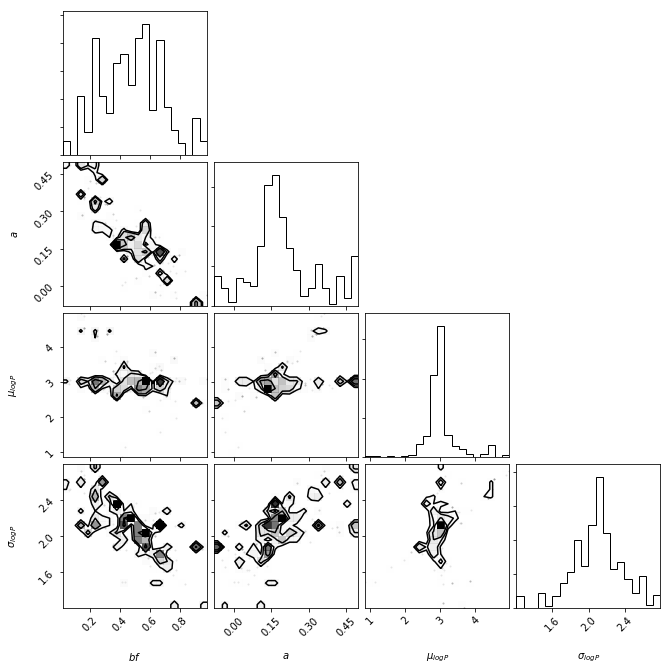

In [257]:
import corner
fig = corner.corner(samples, labels=["$bf$", "$a$", "$\mu_{logP}$", "$\sigma_{logP}$"],
                    )

In [264]:
sampler.acceptance_fraction

array([0.28, 0.28, 0.4 , 0.18, 0.2 , 0.42, 0.64, 0.3 , 0.4 , 0.4 , 0.48,
       0.38])

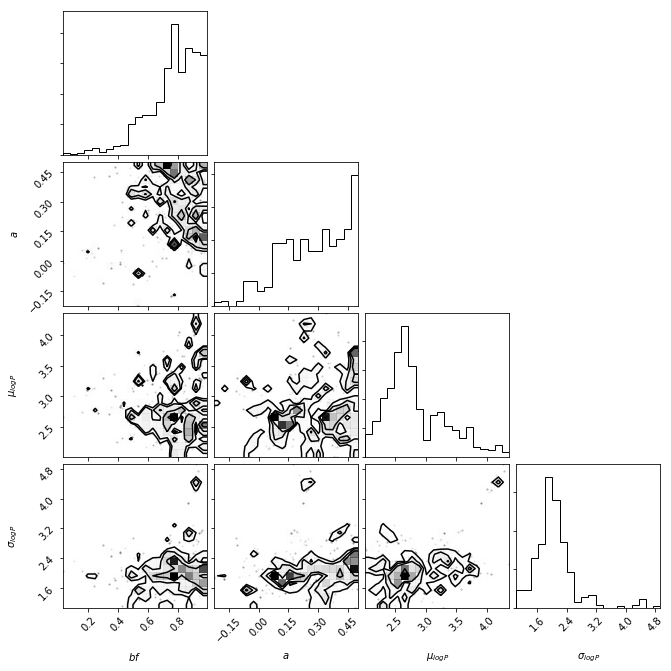

In [271]:
import pickle
sampler = pickle.load( open( "detection_smc.pck", "rb" ) )
samples = sampler.chain[:,:, :].reshape((-1, 4))
fig = corner.corner(samples, labels=["$bf$", "$a$", "$\mu_{logP}$", "$\sigma_{logP}$"],
                    )

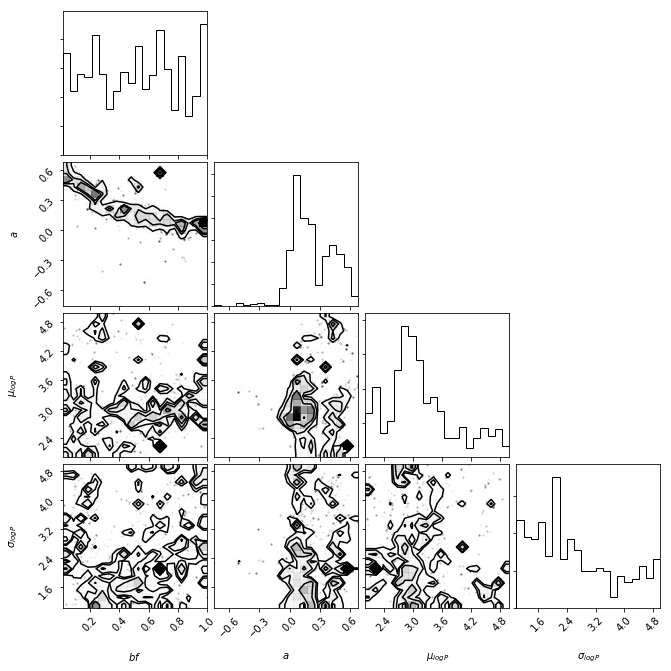

In [273]:
import pickle
sampler = pickle.load( open( "detection_lmc.pck", "rb" ) )
samples = sampler.chain[:,:, :].reshape((-1, 4))
fig = corner.corner(samples, labels=["$bf$", "$a$", "$\mu_{logP}$", "$\sigma_{logP}$"],
                    )

In [274]:
sampler.acceptance_fraction

array([0.175, 0.365, 0.28 , 0.325, 0.29 , 0.165, 0.215, 0.32 , 0.265,
       0.22 , 0.13 , 0.32 , 0.315, 0.295])

In [275]:
samples

array([[ 0.84507961, -0.06134434,  3.00642963,  2.14954598],
       [ 0.84507961, -0.06134434,  3.00642963,  2.14954598],
       [ 0.84507961, -0.06134434,  3.00642963,  2.14954598],
       ...,
       [ 0.14007835,  0.4455221 ,  2.86069834,  2.72900969],
       [ 0.14007835,  0.4455221 ,  2.86069834,  2.72900969],
       [ 0.14007835,  0.4455221 ,  2.86069834,  2.72900969]])

In [285]:
def lnprob(theta, num_of_galaxies, cloud, m_min, a,b,mu,sigma):
    bf, = theta

    error_j = error_with_jitter(cloud['RADIAL_ERR'],
                                                 a,
                                                 b,
                                                 cloud['LOGG'])

    real_data_detection_rate = binary_fraction(cloud['RADIALV'], error_j)
    lp = lnprior(bf, a, b, mu, sigma)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlikelihood(real_data_detection_rate, num_of_galaxies, cloud, bf, m_min, mu, sigma, a, b)

In [286]:
import emcee
def detection_lmc():
    if __name__ == "__main__":

        lmc = fits.getdata('all-average-lmc.fits')
        lmc = table_convert(lmc)
        lmc = second_reduce(Table(lmc))
        lmc['RADIALV'].unit = u.km / u.s
        lmc['RADIAL_ERR'].unit = u.km / u.s

        lmc_err_j = error_with_jitter(lmc['RADIAL_ERR'], 0.3, 0.61, lmc['LOGG'])

        lmc_detection_rate = binary_fraction(lmc['RADIALV'],
                                             lmc["RADIAL_ERR"])
        lmc_detection_rate_j = binary_fraction(lmc['RADIALV'], lmc_err_j)

        ndim, nwalkers = 1, 6
        pos = [np.array([0.5]) + 0.3* np.random.randn(ndim) for i in range(nwalkers)]

        threads = 4
        nsteps = 50

        sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, threads=threads, args=(50, lmc, 100*u.jupiterMass,
                                                                                       0.3, 0.61, 3, 2))

        sampler.run_mcmc(pos, nsteps)
        del sampler.pool
        # pickle "sampler"
        outfile = "detection_lmc-test.pck"
        if os.path.exists(outfile): os.remove(outfile)
        pickle.dump(sampler, open(outfile, "wb"))

In [287]:
detection_lmc()

emcee: Exception while calling your likelihood function:
  params: [-0.00261228]
  args: (50, <Table length=788>
                                          RADIALV                                            ...
                                           km / s                                            ...
                                           object                                            ...
-------------------------------------------------------------------------------------------- ...
[231.17038 230.89876 230.99196 230.83307 230.79813 231.04836 229.54332
 230.8165  230.80255] ...
[250.19618 249.96191 249.9088  249.72995 249.93881 249.45212 249.26218
 250.89487 249.91853] ...
           [237.23451 237.1751  237.20723 236.99663 236.96706 237.01067 237.1595
 236.9611 ] ...
[206.82503 206.81335 206.79012 206.85545 206.95317 206.84123 207.04236
 208.2946  207.70848] ...
[222.02307 222.17189 220.76285 220.97256 220.88548 221.45279 221.27332
 220.40077 221.05911] ...
[232.78552 232

Traceback (most recent call last):


  params: [0.55972054]


  File "/home/cody/anaconda3/lib/python3.6/site-packages/emcee/ensemble.py", line 519, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "<ipython-input-285-4c784d6e7a5e>", line 10, in lnprob
    lp = lnprior(bf, a, b, mu, sigma)
NameError: name 'lnprior' is not defined


emcee: Exception while calling your likelihood function:
  params: [0.26499177]
  args: (50, <Table length=788>
                                          RADIALV                                            ...
                                           km / s                                            ...
                                           object                                            ...
-------------------------------------------------------------------------------------------- ...
[231.17038 230.89876 230.99196 230.83307 230.79813 231.04836 229.54332
 230.8165  230.80255] ...
[250.19618 249.96191 249.9088  249.72995 249.93881 249.45212 249.26218
 250.89487 249.91853] ...
           [237.23451 237.1751  237.20723 236.99663 236.96706 237.01067 237.1595
 236.9611 ] ...
[206.82503 206.81335 206.79012 206.85545 206.95317 206.84123 207.04236
 208.2946  207.70848] ...
[222.02307 222.17189 220.76285 220.97256 220.88548 221.45279 221.27332
 220.40077 221.05911] ...
[232.78552 232.

Traceback (most recent call last):


  params: [0.56551641]


  File "/home/cody/anaconda3/lib/python3.6/site-packages/emcee/ensemble.py", line 519, in __call__
    return self.f(x, *self.args, **self.kwargs)


  args: (50, <Table length=788>
                                          RADIALV                                            ...
                                           km / s                                            ...
                                           object                                            ...
-------------------------------------------------------------------------------------------- ...
[231.17038 230.89876 230.99196 230.83307 230.79813 231.04836 229.54332
 230.8165  230.80255] ...
[250.19618 249.96191 249.9088  249.72995 249.93881 249.45212 249.26218
 250.89487 249.91853] ...
           [237.23451 237.1751  237.20723 236.99663 236.96706 237.01067 237.1595
 236.9611 ] ...
[206.82503 206.81335 206.79012 206.85545 206.95317 206.84123 207.04236
 208.2946  207.70848] ...
[222.02307 222.17189 220.76285 220.97256 220.88548 221.45279 221.27332
 220.40077 221.05911] ...
[232.78552 232.82983 233.09476 232.99303 233.16414 233.0298  233.25323
 233.03505 233.0866 ] ..

  File "<ipython-input-285-4c784d6e7a5e>", line 10, in lnprob
    lp = lnprior(bf, a, b, mu, sigma)
NameError: name 'lnprior' is not defined



  kwargs: {}
  exception:


Traceback (most recent call last):
  File "/home/cody/anaconda3/lib/python3.6/site-packages/emcee/ensemble.py", line 519, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "<ipython-input-285-4c784d6e7a5e>", line 10, in lnprob
    lp = lnprior(bf, a, b, mu, sigma)


  args: (50, <Table length=788>
                                          RADIALV                                            ...
                                           km / s                                            ...
                                           object                                            ...
-------------------------------------------------------------------------------------------- ...
[231.17038 230.89876 230.99196 230.83307 230.79813 231.04836 229.54332
 230.8165  230.80255] ...
[250.19618 249.96191 249.9088  249.72995 249.93881 249.45212 249.26218
 250.89487 249.91853] ...
           [237.23451 237.1751  237.20723 236.99663 236.96706 237.01067 237.1595
 236.9611 ] ...
[206.82503 206.81335 206.79012 206.85545 206.95317 206.84123 207.04236
 208.2946  207.70848] ...
[222.02307 222.17189 220.76285 220.97256 220.88548 221.45279 221.27332
 220.40077 221.05911] ...
[232.78552 232.82983 233.09476 232.99303 233.16414 233.0298  233.25323
 233.03505 233.0866 ] ..

NameError: name 'lnprior' is not defined


  exception:


Traceback (most recent call last):
  File "/home/cody/anaconda3/lib/python3.6/site-packages/emcee/ensemble.py", line 519, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "<ipython-input-285-4c784d6e7a5e>", line 10, in lnprob
    lp = lnprior(bf, a, b, mu, sigma)
NameError: name 'lnprior' is not defined


emcee: Exception while calling your likelihood function:
  params: [0.62401769]
emcee: Exception while calling your likelihood function:
  params: [0.33943687]
  args: (50, <Table length=788>
                                          RADIALV                                            ...
                                           km / s                                            ...
                                           object                                            ...
-------------------------------------------------------------------------------------------- ...
[231.17038 230.89876 230.99196 230.83307 230.79813 231.04836 229.54332
 230.8165  230.80255] ...
[250.19618 249.96191 249.9088  249.72995 249.93881 249.45212 249.26218
 250.89487 249.91853] ...
           [237.23451 237.1751  237.20723 236.99663 236.96706 237.01067 237.1595
 236.9611 ] ...
[206.82503 206.81335 206.79012 206.85545 206.95317 206.84123 207.04236
 208.2946  207.70848] ...
[222.02307 222.17189 220.76285 2

Traceback (most recent call last):
  File "/home/cody/anaconda3/lib/python3.6/site-packages/emcee/ensemble.py", line 519, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "<ipython-input-285-4c784d6e7a5e>", line 10, in lnprob
    lp = lnprior(bf, a, b, mu, sigma)
NameError: name 'lnprior' is not defined


  args: (50, <Table length=788>
                                          RADIALV                                            ...
                                           km / s                                            ...
                                           object                                            ...
-------------------------------------------------------------------------------------------- ...
[231.17038 230.89876 230.99196 230.83307 230.79813 231.04836 229.54332
 230.8165  230.80255] ...
[250.19618 249.96191 249.9088  249.72995 249.93881 249.45212 249.26218
 250.89487 249.91853] ...
           [237.23451 237.1751  237.20723 236.99663 236.96706 237.01067 237.1595
 236.9611 ] ...
[206.82503 206.81335 206.79012 206.85545 206.95317 206.84123 207.04236
 208.2946  207.70848] ...
[222.02307 222.17189 220.76285 220.97256 220.88548 221.45279 221.27332
 220.40077 221.05911] ...
[232.78552 232.82983 233.09476 232.99303 233.16414 233.0298  233.25323
 233.03505 233.0866 ] ..

Traceback (most recent call last):
  File "/home/cody/anaconda3/lib/python3.6/site-packages/emcee/ensemble.py", line 519, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "<ipython-input-285-4c784d6e7a5e>", line 10, in lnprob
    lp = lnprior(bf, a, b, mu, sigma)
NameError: name 'lnprior' is not defined


NameError: name 'lnprior' is not defined